In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [72]:
data=pd.read_csv('sonar_file.csv',names=range(0,61),header=0)

In [25]:
data=pd.DataFrame(data=data)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [26]:
data.shape

(207, 61)

In [27]:
x=data.iloc[:,0:-1]
x.shape

(207, 60)

In [28]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [29]:
y=data.iloc[:,-1]
y.shape

(207,)

In [30]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [31]:
pca=PCA(n_components=10)   #to reduce the columns from 60 to 10

In [32]:
x=pca.fit_transform(x)
x.shape

(207, 10)

In [33]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [34]:
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: 60, Length: 207, dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder   #to convert categorical data to 0 and 1
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
data.shape

(207, 61)

In [37]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [38]:
x.shape

(207, 10)

In [39]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0     207 non-null float64
1     207 non-null float64
2     207 non-null float64
3     207 non-null float64
4     207 non-null float64
5     207 non-null float64
6     207 non-null float64
7     207 non-null float64
8     207 non-null float64
9     207 non-null float64
10    207 non-null float64
11    207 non-null float64
12    207 non-null float64
13    207 non-null float64
14    207 non-null float64
15    207 non-null float64
16    207 non-null float64
17    207 non-null float64
18    207 non-null float64
19    207 non-null float64
20    207 non-null float64
21    207 non-null float64
22    207 non-null float64
23    207 non-null float64
24    207 non-null float64
25    207 non-null float64
26    207 non-null float64
27    207 non-null float64
28    207 non-null float64
29    207 non-null float64
30    207 non-null float64
31    207 non-null float64
32    207 non-null float64
33  

# visualizing data:

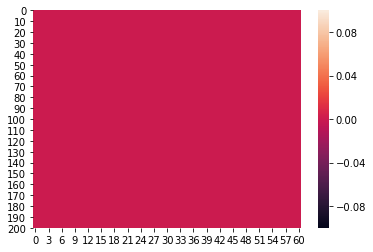

In [41]:
sns.heatmap(data.isnull())

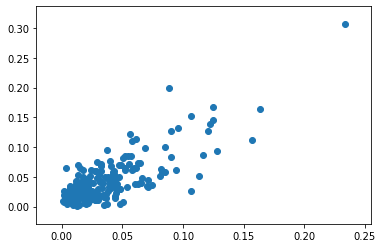

In [42]:
plt.scatter(data.iloc[:,1],data.iloc[:,2])
plt.show()

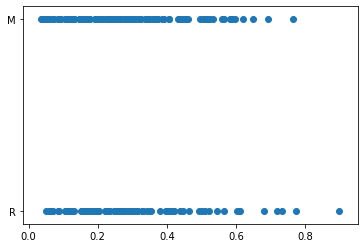

In [43]:
plt.scatter(data.iloc[:,40],data.iloc[:,-1])
plt.show()

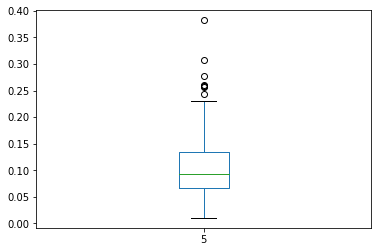

In [44]:
data[5].plot.box()

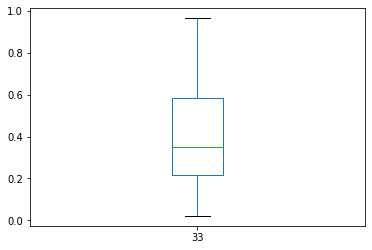

In [45]:
data[33].plot.box()

# training:

In [46]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [49]:
x_train.shape

(161, 10)

In [50]:
y_train.shape

(161,)

In [51]:
x_test.shape

(46, 10)

In [52]:
y_test.shape

(46,)

In [53]:
lg=LogisticRegression()

In [54]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
pred=lg.predict(x_test)

In [56]:
print("accuracy_score :",accuracy_score(pred,y_test))

accuracy_score : 0.8043478260869565


In [57]:
print("confusion_matrix :",confusion_matrix(y_test,pred))

confusion_matrix : [[23  1]
 [ 8 14]]


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46



In [59]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [60]:
#or we can use function
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is :
0.8043478260869565
[[23  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is :
0.782608695652174
[[21  3]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.83      0.68      0.75        22

    accuracy    

In [62]:
#here svc is showing highest accuracy score(0.89) and f-1(0.90) score 

In [67]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier(n_estimators=100,random_state=43)

In [73]:
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8478260869565217
[[23  1]
 [ 6 16]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.94      0.73      0.82        22

    accuracy                           0.85        46
   macro avg       0.87      0.84      0.84        46
weighted avg       0.86      0.85      0.85        46

